Ejercicio de analisis de datos usando phyton

El conjunto de datos, nos muestra posibles clientes que esten interesados o no en adquirir una cuenta de ahorros 

Información del conjunto de datos:

Contiene 16 caracteristicas, que serian las primeras 16 columnas y una categoría (sí o no) dependiendo si la persona está o no interesada en adquirir el producto.


1) age": edad (numérica)
2)"job": tipo de trabajo (categórica: "admin.",
"unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3)"marital": estado civil (categórica: "married", "divorced", "single")
4)"education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5)"default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6) "balance": saldo promedio anual en euros (numérica)
7)"housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8)"loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9)"contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10)"day": último día del mes en el que fue contactada (numérica)
11)"month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12)"duration": duración (en segundos) del último contacto (numérica)
13)"campaign": número total de veces que fue contactada durante la campaña (numérica)
14)"pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15)"previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16)"poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17)"y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Lectura de datos

data= pd.read_csv('/content/dataset_banco_clean.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45184,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45185,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45186,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45187,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


La pregunta planteada para este conjuntos de datos es
¿Qué perfil tienen los clientes con mayor potencial de adquirir una cuenta de ahorros?

Análisis de cada variable de manera individual 

In [ ]:
# Con data.info() podemos ver las variables categóricas
# (Dtype=object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


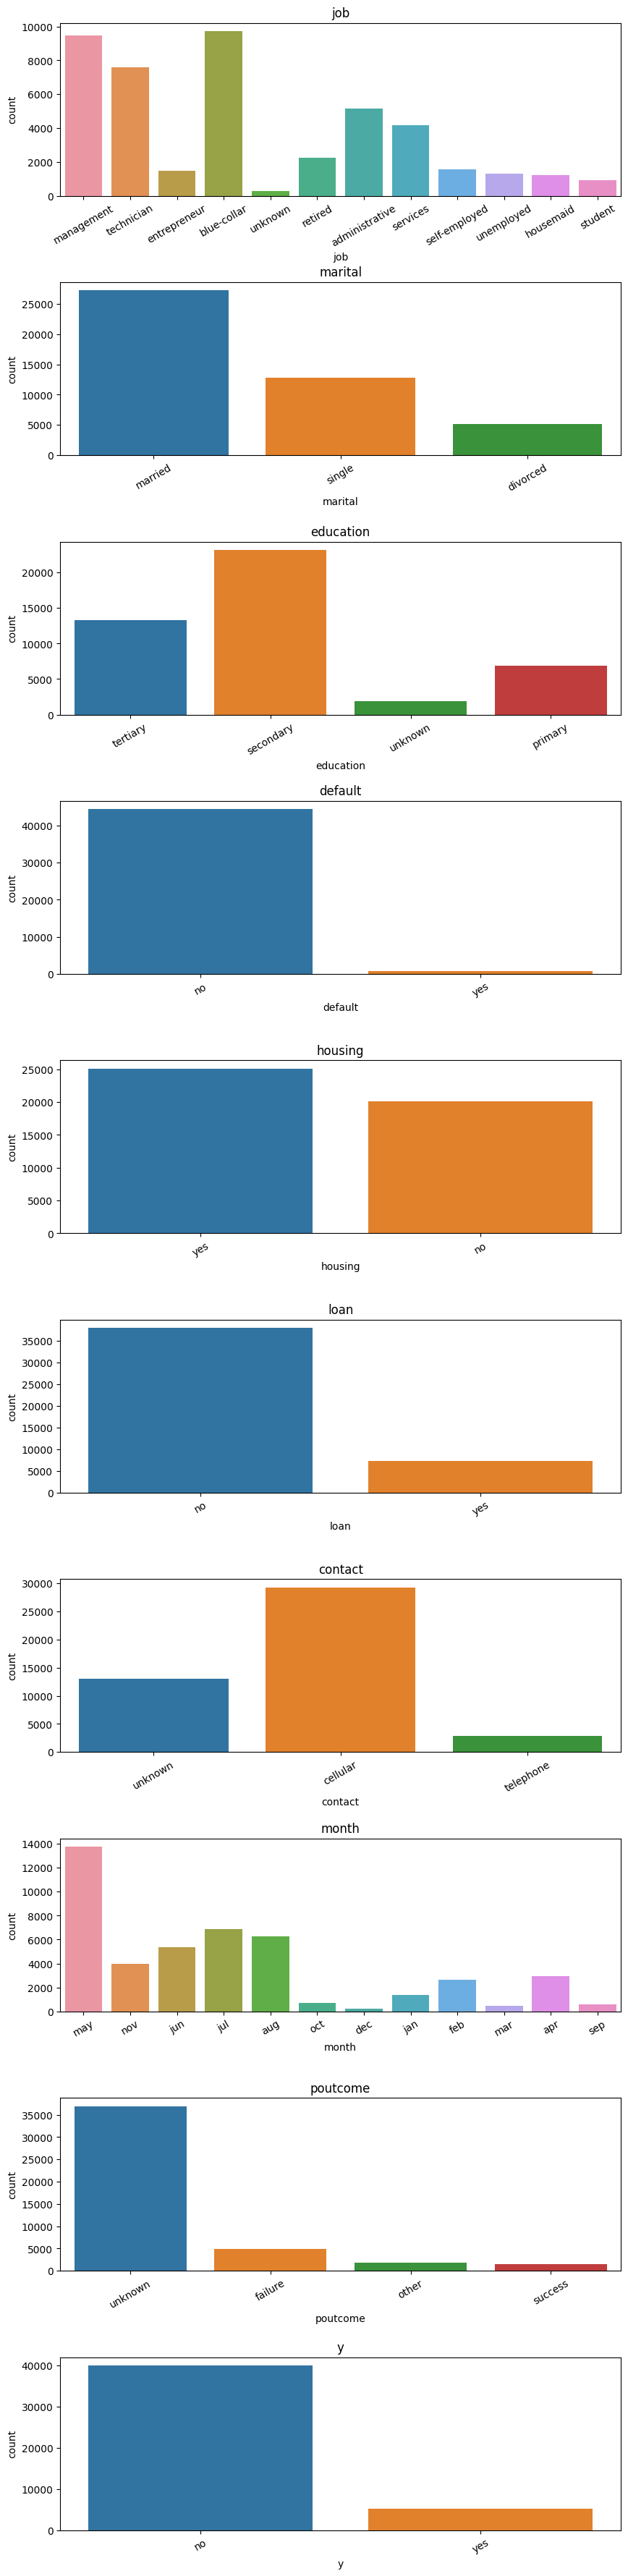

In [ ]:
# Tomemos las variables categóricas y generemos gráficos de barras

col_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [ ]:
# Eliminemos las columnas "contact", "month", "day", "duration", "campaign",
# "pdays" y "previous" pues no aportan información sobre el cliente

data.drop(columns=['contact','month', 'day', 'duration', 'campaign', 'pdays',
                   'previous'],inplace=True)
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# Podemos extraer algunas variables estadísticas descriptivas básicas
data.describe()

,age,balance
count,45189.000000,45189.000000
mean,40.936445,1374.012149
std,10.618502,3924.370039
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,527532.000000


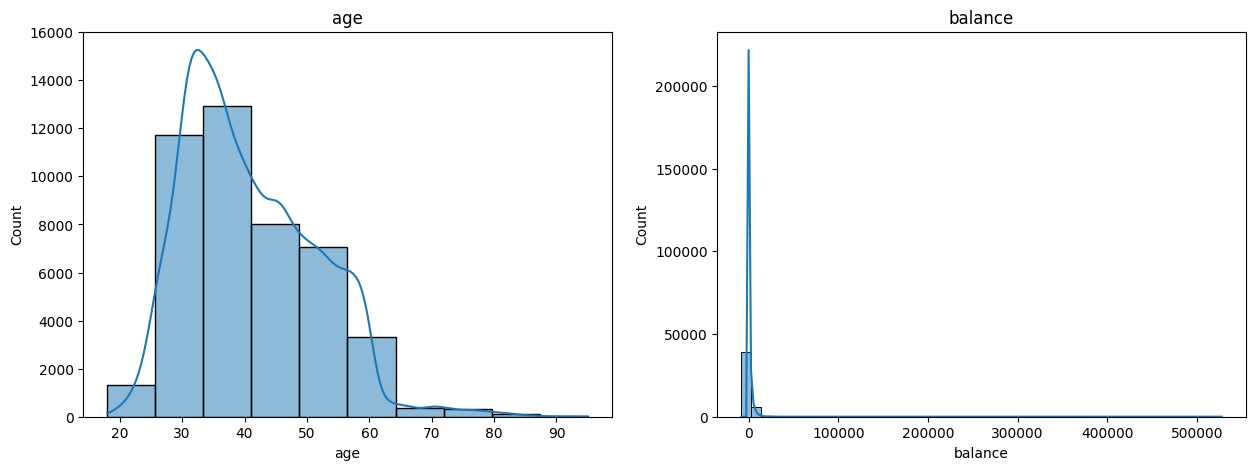

In [ ]:
#Para una mejor visualización 

# Dibujar histogramas
col_num = ['age', 'balance']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'age':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

In [ ]:
# Veamos en detalle lo que ocurre con balance
data['balance'].describe()

count     45189.000000
mean       1374.012149
std        3924.370039
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      527532.000000
Name: balance, dtype: float64

Observaciones:

La mayor parte del grupo contactado tiene edades entre 30 y 50 años.

La mayor parte del grupo contactado el 75%  tiene saldo menor a 1500 aproximadamente.